<a href="https://colab.research.google.com/github/tentenvi/tteessstt/blob/main/lab5/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_5!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#–õ–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è

##–í—ã–±–æ—Ä –∏ –∏—Å–∫–ª—é—á–µ–Ω–∏–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö

–ó–∞–≥—Ä—É–∑–∏—Ç–µ –Ω–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö –∏–∑ —Ñ–∞–π–ª–∞ ```Regressions datasets``` –≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–∏ —Å –≤–∞—à–∏–º –≤–∞—Ä–∏–∞–Ω—Ç–æ–º (–æ —Å–º–µ–Ω–µ –¥–∞—Ç–∞—Å–µ—Ç–∞ - –∏–Ω–¥–∏–≤–∏–¥—É–∞–ª—å–Ω–æ)

In [21]:
!pip install datasets seaborn

In [22]:
import pandas as pd
from datasets import load_dataset
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [23]:
!pip install xlrd

In [24]:
df = pd.read_excel('Real estate valuation data set.xlsx') #—á—Ç–µ–Ω–∏–µ —Ñ–∞–π–ª–∞
df.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [25]:
df

X1 transaction date  X2 house age  \
0            2012.916667          32.0   
1            2012.916667          19.5   
2            2013.583333          13.3   
3            2013.500000          13.3   
4            2012.833333           5.0   
..                   ...           ...   
409          2013.000000          13.7   
410          2012.666667           5.6   
411          2013.250000          18.8   
412          2013.000000           8.1   
413          2013.500000           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 390.56840                                5   
..                                      ...                              ...   
409                              4082.01500                                0   
410                                90.45606                                9   
411                               390.96960                                7   
412                               104.81010                                5   
413                                90.45606                                9   

     X5 latitude  X6 longitude  Y house price of unit area  
0       24.98298     121.54024                        37.9  
1       24.98034     121.53951                        42.2  
2       24.98746     121.54391                        47.3  
3       24.98746     121.54391                        54.8  
4       24.97937     121.54245                        43.1  
..           ...           ...                         ...  
409     24.94155     121.50381                        15.4  
410     24.97433     121.54310                        50.0  
411     24.97923     121.53986                        40.6  
412     24.96674     121.54067                        52.5  
413     24.97433     121.54310                        63.9  

[414 rows x 7 columns]

In [ ]:
# correlation_matrix = df.corr()
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True)
# plt.title('Correlation Matrix')
# plt.show()

### –ü—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑

1. –í—ã–±—Ä–∞—Ç—å —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é Y (Y - —á–∏—Å–ª–æ–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è –¥–ª—è –∑–∞–¥–∞—á–∏ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏)
2. –° –ø–æ–º–æ—â—å—é EDA (—Å–º –ø—Ä–∞–∫—Ç–∏–∫–∞) –æ—Ç–æ–±—Ä–∞—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∏, –∫–æ—Ç–æ—Ä—ã–µ –≤–ª–∏—è—é—Ç –Ω–∞ Y (–º–æ–∂–Ω–æ –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å –≥–∞—Ä—Ñ–∏—á–µ—Å–∫–∏, –º–æ–∂–Ω–æ —á–∏—Å–ª–∞–º–∏).
3. –û–±—Ä–∞–±–æ—Ç–∞—Ç—å –ø—Ä–æ–ø—É—Å–∫–∏, –ø—Ä–∏ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç–∏ –ø–æ—á–∏—Å—Ç–∏—Ç—å –æ—Ç –≤—ã–±—Ä–æ—Å–æ–≤ (—Ç—É—Ç –≤–∞–∂–Ω–æ–µ –∑–∞–º–µ—á–∞–Ω–∏–µ - –Ω–µ –≤—Å–µ –≤—ã–±—Ä–æ—Å—ã —ç—Ç–æ –ø–ª–æ—Ö–æ)
4. –û–±–æ—Å–Ω–æ–≤–∞—Ç—å –≤—ã–±–æ—Ä –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –¥–ª—è –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è (–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è, —Ä–∞–∑–ª–∏—á–∏—è –ø–æ –∫–ª–∞—Å—Å–∞–º, –∏ —Ç–∞–∫ –¥–∞–ª–µ–µ)

P.S. –í–∞–∂–Ω–æ–µ –∑–∞–º–µ—á–∞–Ω–∏–µ, —Å–ª–∏—à–∫–æ–º —É–Ω–∏–∫–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ (–∏–º–µ–Ω–∞ –ª—é–¥–µ–π, –Ω–∞–∑–≤–∞–Ω–∏—è –≥–æ—Ä–æ–¥, ID —é–∑–µ—Ä–∞ –∏–ª–∏ —á–µ–≥–æ-—Ç–æ –µ—â–µ - –Ω–µ –±–µ—Ä–µ–º, —Ç–∞–∫ –∫–∞–∫ –æ–Ω–∏ –Ω–µ –≤–ª–∏—è—é—Ç –Ω–∞ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é, –∞ –µ—Å–ª–∏ –∏ –≤–ª–∏—è–µ—Ç, —Ç–æ —ç—Ç–æ —Å–ª—É—á–∞–π–Ω–æ)

In [26]:
#—É–±–∏—Ä–∞–µ–º –Ω–µ–Ω—É–∂–Ω—ã–µ —Å—Ç–æ–ª–±—Ü—ã

df = df.drop(['X1 transaction date', 'X5 latitude', 'X6 longitude'], axis=1)
df.columns

Index(['X2 house age', 'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'Y house price of unit area'],
      dtype='object')

<Axes: >

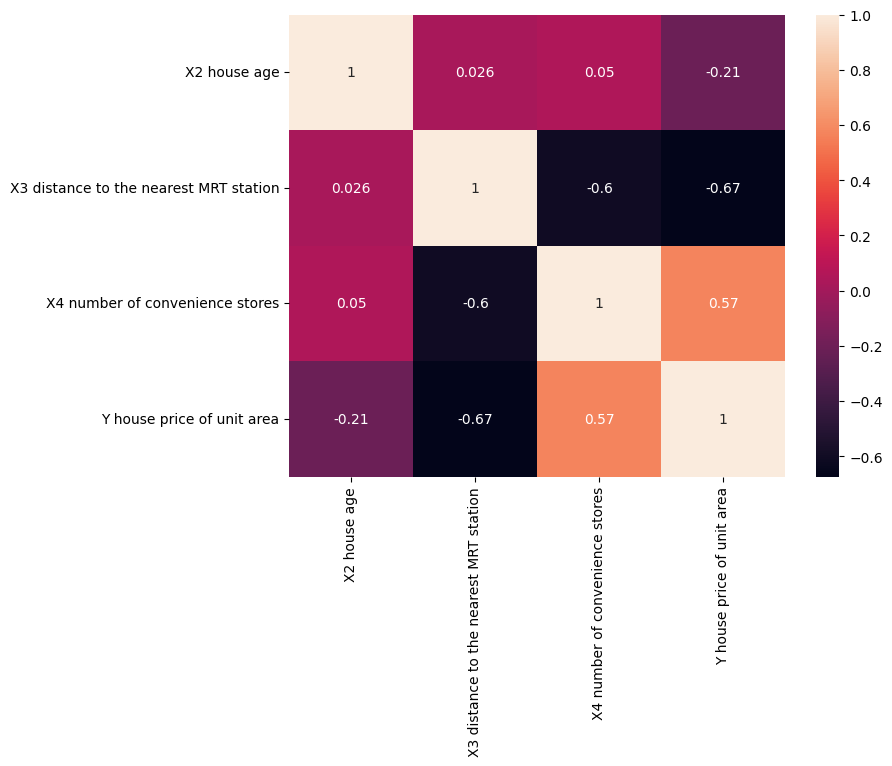

In [27]:
#–æ–ø—Ä–µ–¥–µ–ª—è–µ–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True)

In [28]:
# —á–∏—Å—Ç–∏–º –ø—Ä–æ–ø—É—Å–∫–∏
for x in df["X4 number of convenience stores"]:
  print(x)
#–ø—Ä–æ–ø—É—Å–∫–æ–≤ –Ω–µ—Ç

10
9
5
5
5
3
7
6
1
3
1
9
5
4
4
2
6
1
8
7
3
7
1
7
4
2
5
5
4
5
0
7
1
6
7
0
2
1
6
5
0
0
5
6
4
8
9
3
0
1
4
1
3
5
5
0
8
7
1
5
2
6
3
4
0
8
6
5
6
5
9
3
8
0
10
1
3
3
2
1
4
6
7
3
7
9
1
0
0
0
1
0
4
0
5
5
9
3
5
9
4
1
6
6
6
6
8
1
2
3
5
7
3
6
8
2
1
0
3
5
5
5
4
0
7
6
4
5
6
7
8
3
5
8
6
0
5
6
0
5
5
3
5
5
1
5
0
8
0
8
7
9
1
6
0
0
0
4
5
4
8
3
0
5
0
1
6
8
5
1
0
5
9
4
7
3
0
9
4
1
0
8
3
0
0
3
3
0
8
0
8
2
7
5
0
5
2
8
7
8
0
5
3
5
1
3
10
3
1
8
5
1
2
9
3
8
1
6
5
8
9
0
10
0
6
6
0
8
0
0
3
0
1
9
4
7
10
0
0
0
2
7
3
8
3
5
6
0
0
1
7
0
9
2
5
1
1
1
6
0
4
3
5
3
7
4
3
5
5
0
1
8
5
1
7
7
5
3
6
3
6
9
1
2
7
3
9
5
6
5
0
7
5
7
6
3
4
4
0
10
4
0
3
0
3
5
1
0
5
0
2
4
9
5
6
2
7
2
10
5
0
4
1
6
2
8
7
3
3
0
0
0
2
5
5
6
2
5
9
5
0
2
9
8
0
0
2
1
6
5
5
3
3
3
1
5
1
9
6
0
10
8
4
10
7
4
1
2
1
3
5
5
7
1
5
0
2
8
8
6
5
9
0
4
0
10
0
3
4
8
9
1
6
4
1
4
1
4
2
1
5
3
1
9
5
6
7
0
3
0
9
7
5
9


<Axes: ylabel='X4 number of convenience stores'>

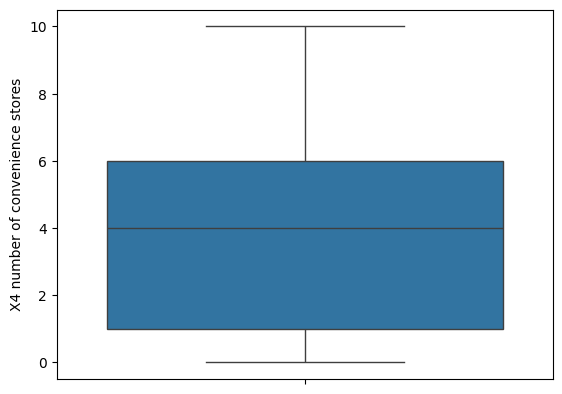

In [29]:
#–ø—Ä–æ–≤–µ—Ä—è–µ–º –Ω–∞ –≤—ã–±—Ä–æ—Å—ã "X4 number of convenience stores"

sns.boxplot(data = df, y = "X4 number of convenience stores")

<Axes: ylabel='X4 number of convenience stores'>

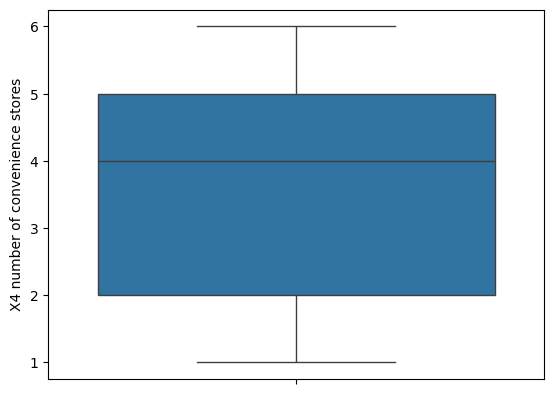

In [30]:
#—É–±–∏—Ä–∞–µ–º –≤—Å–µ —á—Ç–æ –Ω–µ –≤–ø–∏—Å—ã–≤–∞–µ—Ç—Å—è –≤ 1 –∏ 4 –∫–≤–∞—Ä—Ç–∏–ª–∏

q = df["X4 number of convenience stores"].quantile([0.25,0.5,0.75])

for index, value in df["X4 number of convenience stores"].items():
  if value < q[0.25] or value > q[0.75]: df = df.drop(index)

sns.boxplot(data = df, y = "X4 number of convenience stores")

In [ ]:
# # –ü—Ä–∏–º–µ—Ä —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫—É
# X = df
# y = df.Y_house_price_of_unit_area  #—Ü–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è
# X = X.drop('Y_house_price_of_unit_area', axis=1) # –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# y_train, y_test # 331 —Å—Ç—Ä–æ–∫–∞ –Ω–∞ –æ—É–±—á–µ–Ω–∏–µ –∏ 83 —Å—Ç—Ä–æ–∫–∏ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏—é

### –¢—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü–∏—è –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö

(OneHotEncode –¥–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö)

(Standard or MinMax or –±–∏–Ω–∏–Ω–≥ –∏–ª–∏ –¥—Ä—É–≥–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –¥–ª—è —á–∏—Å–ª–æ–≤—ã—Ö)

P.S. –¶–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é –Ω–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤—ã–≤–∞–µ–º, –æ—Å—Ç–∞–≤–ª—è–µ–º –∫–∞–∫ –µ—Å—Ç—å


In [ ]:
# df['X4_number_of convenience_stores'] = df['X4_number_of convenience_stores'].astype('category')
# df = df.drop('X1_transaction_date', axis=1)
# df

In [31]:
#–∫–æ–ø–∏—Ä—É–µ–º –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ —Å—Ç–æ–ª–±—Ü—ã –≤ –æ—Ç–¥–µ–ª—å–Ω—ã–π df
num_features = df.select_dtypes(include=['float64', 'int64']).columns

df_work = df[['Y house price of unit area', "X4 number of convenience stores"]]
ss = StandardScaler()
df_work[num_features] = ss.fit_transform(df[num_features])

df_work
#—Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü–∏—è

<ipython-input-31-a2cd6dbfe557>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_work[num_features] = ss.fit_transform(df[num_features])


Y house price of unit area  X4 number of convenience stores  \
2                      0.740098                         0.794619   
3                      1.320782                         0.794619   
4                      0.414915                         0.794619   
5                     -0.436755                        -0.371751   
7                      0.693644                         1.377804   
..                          ...                              ...   
402                   -0.715483                        -1.538121   
404                    0.267809                         0.794619   
405                   -0.041889                         1.377804   
408                   -0.746453                        -0.371751   
412                    1.142706                         0.794619   

     X2 house age  X3 distance to the nearest MRT station  
2       -0.298245                               -0.431094  
3       -0.298245                               -0.431094  
4       -1.069800                               -0.588173  
5       -0.874587                                1.047042  
7        0.352464                               -0.682528  
..            ...                                     ...  
402     -0.354020                               -0.774274  
404     -0.010074                               -0.680949  
405      0.603452                               -0.826037  
408      0.185139                                1.047696  
412     -0.781629                               -0.850032  

[251 rows x 4 columns]

In [17]:
# plt.figure(figsize=(15, 15))

# for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
#     plt.subplot(4, 3, i)
#     sns.histplot(df[column], kde=True)
#     plt.title(column)

# plt.tight_layout()
# plt.show()

In [ ]:
# plt.figure(figsize=(10, 5))
# sns.countplot(data=df, x='X4_number_of convenience_stores')

# plt.show()

In [ ]:
# sns.boxplot(data=df)

In [ ]:
# df.info()

In [ ]:
# from sklearn.preprocessing import StandardScaler


# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(df[['X2_house_age', 'X3_distance_to _the_nearest_MRT_station', 'X5_latitude', 'X6_longitude']])
# number_of_convenience_stores_bins_dummies = pd.get_dummies(df['X4_number_of convenience_stores'], prefix='number_of convenience_stores')
# # –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ dummy –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
# df_transformed = pd.DataFrame(scaled_features, columns=['X2_house_age', 'X3_distance_to_the_nearest_MRT_station', 'X5_latitude', 'X6_longitude'])
# df_transformed = pd.concat([df_transformed, number_of_convenience_stores_bins_dummies], axis=1)

# df_y = df['Y_house_price_of_unit_area'].reset_index()
# df_itog = pd.concat([df_transformed,df_y['Y_house_price_of_unit_area'] , ], axis=1)
# df_itog

### –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö

–î–ª—è –Ω–∞—á–∞–ª–∞, —Ä–∞–∑–¥–µ–ª–∏—Ç—å –¥–∞–Ω–Ω—ã–µ –Ω–∞ X –∏ Y

–†–∞–∑–±–∏—Ç—å –¥–∞–Ω–Ω—ã–µ –Ω–∞ —Ç–µ—Å—Ç–æ–≤—É—é –∏ –æ–±—É—á–∞—é—â—É—é –≤—ã–±–æ—Ä–∫–∏

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
# df.describe()
# df

In [ ]:
# X = df_itog.drop('Y_house_price_of_unit_area', axis=1)

In [ ]:
# y = df_itog['Y_house_price_of_unit_area']

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# –í—ã–±–æ—Ä–∫–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
X = df_work.copy()
y = df_work['Y house price of unit area']
X = X.drop(['Y house price of unit area'], axis=1)

### –û–±—É—á–µ–Ω–∏–µ
#### 1 –†–µ–≥—Ä–µ—Å—Å–∏—è
- –û–±—É—á–∏—Ç—å –ª–∏–Ω–µ–π–Ω—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
- –°–¥–ª–µ–∞—Ç—å .predict() –¥–ª—è X_train, X_test
- –†–∞—Å—Å—á–∏—Ç–∞—Ç—å –º–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ MAE, MSE, MAPE, R2
- –í—ã–≤–µ—Å—Ç–∏ –∏ –Ω–∞–ø–∏—Å–∞—Ç—å –≤—ã–≤–æ–¥—ã –æ –∫–æ—ç—Ñ–∏—Ü–∏–µ–Ω—Ç–∞—Ö —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
- –ù–∞–ø–∏—Å–∞—Ç—å —Ñ–æ—Ä–º—É–ª—É —Ä–µ–≥—Ä–µ—Å—Å–∏–∏

–°–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥—ã –æ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–∏ –º–æ–¥–µ–ª–∏ (—Å–º –º–µ—Ç—Ä–∏–∫–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ) —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥—ã –æ –º–µ—Ç—Ä–∏–∫–∞—Ö –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ

#### 2 –ë–ª–∏–∂–∞–π—à–∏–µ —Å–æ—Å–µ–¥–∏
- –û–±—É—á–∏—Ç—å KNN (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)
- –°–¥–ª–µ–∞—Ç—å .predict() –¥–ª—è X_train, X_test
- –†–∞—Å—Å—á–∏—Ç–∞—Ç—å –º–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ MAE, MSE, MAPE, R2

–°–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥—ã –æ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–∏ –º–æ–¥–µ–ª–∏ (—Å–º –º–µ—Ç—Ä–∏–∫–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ) —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥—ã –æ –º–µ—Ç—Ä–∏–∫–∞—Ö –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ

In [33]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def compute_regression(X, y):
  # –°–æ–∑–¥–∞–Ω–∏–µ –∏ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
  model = LinearRegression()
  model.fit(X, y)
  return model

def compute_knn(X, y, m, n):
  model = KNeighborsRegressor(metric=m, n_neighbors=n)
  model.fit(X, y)
  return model

def compute_metrics(y, predicted):
  # –û—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏
  mae = mean_absolute_error(y, predicted)
  mse = mean_squared_error(y, predicted)
  r2 = r2_score(y, predicted)
  mape = mean_absolute_percentage_error(y, predicted)

  return {
      'MAE': mae,
      'MSE': mse,
      'R2': r2,
      'mape (reverted - % –≤–µ—Ä–Ω–æ —É–≥–∞–¥–∞–Ω—ã—Ö)': (1 - mape) * 100,
      'mape (original - % –æ—à–∏–±–æ–∫)': mape * 100,
  }

In [ ]:
# model = compute_regression(X_train, y_train) # –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ (–ø—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ)
# y_pred = model.predict(X_train)

# compute_metrics(y_train, y_pred)

In [ ]:
# model = compute_regression(X_train, y_train) # –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ
# y_pred = model.predict(X_test)

# compute_metrics(y_test, y_pred)

In [ ]:
# df_itog

##–ó–∞–¥–∞–Ω–∏–µ –¥–ª—è –≥–µ–Ω–∏–µ–≤*

–£–¥–∞—á–∏ üòà

–í –ø—Ä–∞–∫—Ç–∏–∫–µ –µ—Å—Ç—å –ø—Ä–∏–º–µ—Ä—ã —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–∏ ```linear_regression``` –∏ ```knn_regressor```, –Ω–æ –µ—Å—Ç—å –Ω—é–∞–Ω—Å... –°–µ–π—á–∞—Å –Ω–∏ linear_regression, –Ω–∏ knn_regressor –Ω–µ –ø–æ–¥–¥–µ—Ä–∂–∏–≤–∞—é—Ç —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è —Å–æ—Å—Ç–æ—è–Ω–∏—è –¥–ª—è –ø–æ—Å–ª–µ–¥—É—é—â–µ–≥–æ –≤–æ–∑–º–æ–∂–Ω–æ–≥–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è.

–ù–µ–æ–±—Ö–æ–¥–∏–º–æ - —Ä–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å –¥–≤–∞ –∫–ª–∞—Å—Å–∞ LinearRegression –∏ KNNRegression (–ø—Ä–∏–º–µ—Ä—ã –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–∫ –µ—Å—Ç—å). –í —ç—Ç–∏—Ö –∫–ª–∞—Å—Å–∞—Ö –æ–±—è–∑–∞—Ç–ª—å–Ω–æ –¥–æ–ª–∂–Ω—ã –±—ã—Ç—å –¥–≤–∞ –º–µ—Ç–æ–¥–∞
```
.fit(X: np.array, y: np.array) -> None - –æ–±—É—á–∏—Ç—å –º–æ–¥–µ–ª—å –∏ —Å–æ—Ö—Ä–∞–Ω–∏—Ç—å –≤–Ω—É—Ç—Ä–µ–Ω–Ω–µ–µ —Å–æ—Å—Ç–æ—è–Ω–∏–µ –º–æ–¥–µ–ª–∏
.predict(X) -> np.array - –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å y –Ω–∞ –æ—Å–Ω–æ–≤–µ X
```
–ü—Ä–∏ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏ –∫–ª–∞—Å—Å–∞ - –ø–µ—Ä–µ–¥–∞–≤–∞—Ç—å –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏ –≤ –º–æ–º–µ–Ω—Ç –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏. –ù–∞–ø—Ä–∏–º–µ—Ä:

```
model = LinearRegression(**params)

model.fit(X_train, y_train)
model.predict(X_test)
```

–í –∫–∞—á–µ—Å—Ç–≤–µ —Ç–µ—Å—Ç–æ–≤ –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å KNN –∏ LinearRegression –∏–∑ sklearn, —Ä–µ–∑—É–ª—å—Ç–∞—Ç —Ä–∞–±–æ—Ç—ã –≤–∞—à–∏—Ö –æ–±—ä–µ–∫—Ç–æ–≤ –¥–æ–ª–∂–µ–Ω –ø—Ä–∏–º–µ—Ä–Ω–æ —Å–æ–≤–ø–∞–¥–∞—Ç—å —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏ —Ä–∞–±–æ—Ç—ã –æ–±—ä–µ–∫—Ç–æ–≤ –∏–∑ sklearn

–í —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ —Ä–∞–±–æ—Ç—ã —Å–¥–µ–ª–∞—Ç—å —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ —Å —Ç–µ–º–∏ –∂–µ –¥–∞–Ω–Ω—ã–º–∏ –≤ sklearn

In [ ]:
"""
–†–µ–∑—É–ª—å—Ç–∞—Ç —Ä–∞–±–æ—Ç—ã
"""